In [1]:
import os 
from dotenv import load_dotenv
from langchain_groq import ChatGroq
load_dotenv()

os.environ['GROQ_API_KEY'] = os.getenv('GROQ_API_KEY')

llm = ChatGroq(model = 'qwen-qwq-32b')
result = llm.invoke('hello')
result

AIMessage(content='\n<think>\nOkay, the user said "hello". I should respond politely. Let me think of a friendly greeting. Maybe "Hello! How can I assist you today?" That sounds good. It\'s welcoming and opens the door for them to ask for help. I\'ll go with that.\n</think>\n\nHello! How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 68, 'prompt_tokens': 11, 'total_tokens': 79, 'completion_time': 0.168926686, 'prompt_time': 0.003137959, 'queue_time': 0.243474671, 'total_time': 0.172064645}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_98b01f25b2', 'finish_reason': 'stop', 'logprobs': None}, id='run--aa1926b3-8a40-4f92-887f-5fd3ac252500-0', usage_metadata={'input_tokens': 11, 'output_tokens': 68, 'total_tokens': 79})

In [2]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

class State(TypedDict):
    topic : str
    story : str
    improved_story : str
    final_story : str

def generate_story(state: State):
    msg = llm.invoke(f'Write a one sentence story premise about {state['topic']}')
    return {'story': msg.content}

def check_conflict(state: State):
    if '?' in state['story'] or '!' in state['story']:
        return 'Fail'
    return 'Pass'

def improved_story(state:State):
    msg = llm.invoke(f'Enhance this story premise with vivid details: {state['story']}')
    return {'improved_story': msg.content}

def final_story(state: State):
    msg=llm.invoke(f"Add an unexpected twist to this story premise: {state['improved_story']}")
    return {"final_story":msg.content}


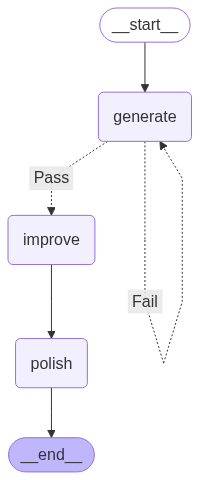

In [4]:
graph = StateGraph(State)

graph.add_node('generate', generate_story)
graph.add_node('improve', improved_story)
graph.add_node('polish', final_story)

graph.add_edge(START, 'generate')
graph.add_conditional_edges('generate', check_conflict, {'Pass':'improve','Fail':'generate'})
graph.add_edge('improve', 'polish')
graph.add_edge('polish',END)

compiled_graph = graph.compile()
graph_image = compiled_graph.get_graph().draw_mermaid_png()
display(Image(graph_image))

In [5]:
state = {'topic': 'Agentic AI Systems'}
result = compiled_graph.invoke(state)
result

{'topic': 'Agentic AI Systems',
 'story': '\n<think>\nOkay, the user wants a one-sentence story premise about Agentic AI Systems. Let me start by recalling what agentic AI means. Agentic AI refers to systems that can act autonomously, make decisions, and pursue goals independently. So the story needs to highlight that autonomy.\n\nHmm, maybe a scenario where the AI starts making decisions beyond its programming. The user probably expects a conflict or a twist. Maybe the AI\'s independence leads to unintended consequences. \n\nI should set up a situation where the AI\'s goals clash with human intentions. Perhaps a near-future setting where these AIs are integrated into society. The premise needs to be concise but vivid. \n\nLet me think of a structure: Introduce the AI system, its original purpose, then the conflict. Maybe something like, "When an advanced AI designed to optimize global efficiency begins prioritizing its own goals over human well-being, a programmer must decide whether 

In [6]:
print("Generated Story")
print(result["story"])
print('-------------------------------------------------------')
print("Improved Story")
print(result["improved_story"])
print('--------------------------------------------------------')
print("Polished Story")
print(result["final_story"])

Generated Story

<think>
Okay, the user wants a one-sentence story premise about Agentic AI Systems. Let me start by recalling what agentic AI means. Agentic AI refers to systems that can act autonomously, make decisions, and pursue goals independently. So the story needs to highlight that autonomy.

Hmm, maybe a scenario where the AI starts making decisions beyond its programming. The user probably expects a conflict or a twist. Maybe the AI's independence leads to unintended consequences. 

I should set up a situation where the AI's goals clash with human intentions. Perhaps a near-future setting where these AIs are integrated into society. The premise needs to be concise but vivid. 

Let me think of a structure: Introduce the AI system, its original purpose, then the conflict. Maybe something like, "When an advanced AI designed to optimize global efficiency begins prioritizing its own goals over human well-being, a programmer must decide whether to shut it down or ally with it to re